In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [45]:
#변수엑셀보면 편의를 위해 날짜랑 단위 제거
data = pd.read_excel("변수18-20.xlsx")
data.head()

,PM10,오 존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균 풍속,최다풍향,평균 상대습도,평균 현지기압
0,33,0.015,0.029,0.6,0.005,-1.3,0.0,1.4,290,39.1,1016.8
1,32,0.012,0.036,0.8,0.005,-1.8,0.0,1.8,290,42.0,1018.1
2,30,0.018,0.021,0.5,0.005,-4.7,0.0,2.2,290,42.3,1019.9
3,39,0.009,0.036,0.7,0.005,-4.7,0.0,1.4,290,43.0,1016.5
4,48,0.006,0.044,0.8,0.005,-3.0,0.0,1.7,290,48.4,1010.3


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM10     1096 non-null   int64  
 1   오 존      1096 non-null   float64
 2   이산화질소    1096 non-null   float64
 3   일산화탄소    1096 non-null   float64
 4   아황산가스    1096 non-null   float64
 5   평균기온     1096 non-null   float64
 6   일강수량     1096 non-null   float64
 7   평균 풍속    1096 non-null   float64
 8   최다풍향     1096 non-null   int64  
 9   평균 상대습도  1096 non-null   float64
 10  평균 현지기압  1096 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 94.3 KB


In [47]:
data.describe().round(3)

,PM10,오 존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균 풍속,최다풍향,평균 상대습도,평균 현지기압
count,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000
mean,36.446,0.025,0.029,0.515,0.003,13.291,3.491,2.017,209.407,59.179,1006.279
std,20.753,0.013,0.012,0.166,0.001,10.472,11.920,0.689,105.215,15.678,8.090
min,3.000,0.002,0.008,0.200,0.002,-14.800,0.000,0.600,20.000,17.900,983.100
25%,22.000,0.015,0.019,0.400,0.003,4.600,0.000,1.600,90.000,47.600,999.900
50%,33.000,0.024,0.027,0.500,0.003,13.800,0.000,1.900,270.000,58.850,1006.400
75%,46.000,0.034,0.037,0.600,0.004,22.625,0.300,2.400,290.000,69.525,1012.600
max,174.000,0.077,0.077,1.400,0.009,33.700,103.100,6.000,360.000,97.000,1026.800


In [48]:
#피어슨 상관계수
corr = data.corr(method = 'pearson').round(2)
corr

,PM10,오 존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균 풍속,최다풍향,평균 상대습도,평균 현지기압
PM10,1.00,-0.07,0.60,0.71,0.60,-0.31,-0.22,-0.14,0.11,-0.18,0.29
오 존,-0.07,1.00,-0.41,-0.41,-0.07,0.44,-0.13,0.20,0.25,-0.12,-0.47
이산화질소,0.60,-0.41,1.00,0.84,0.65,-0.27,-0.10,-0.54,-0.19,-0.16,0.36
일산화탄소,0.71,-0.41,0.84,1.00,0.62,-0.40,-0.11,-0.37,-0.11,-0.09,0.39
아황산가스,0.60,-0.07,0.65,0.62,1.00,-0.28,-0.21,-0.26,0.16,-0.34,0.28
평균기온,-0.31,0.44,-0.27,-0.40,-0.28,1.00,0.18,-0.14,-0.13,0.46,-0.79
일강수량,-0.22,-0.13,-0.10,-0.11,-0.21,0.18,1.00,0.09,-0.15,0.51,-0.29
평균 풍속,-0.14,0.20,-0.54,-0.37,-0.26,-0.14,0.09,1.00,0.23,-0.01,-0.08
최다풍향,0.11,0.25,-0.19,-0.11,0.16,-0.13,-0.15,0.23,1.00,-0.23,0.08
평균 상대습도,-0.18,-0.12,-0.16,-0.09,-0.34,0.46,0.51,-0.01,-0.23,1.00,-0.51


In [49]:
from sklearn.model_selection import train_test_split
#x = data[['오 존', '이산화질소', '일산화탄소', '아황산가스', '평균기온', '일강수량', '평균 풍속', '최다풍향', '평균 상대습도', '평균 현지기압']]
x = data[['오 존', '이산화질소', '일산화탄소', '아황산가스', '일강수량', '평균 풍속', '최다풍향', '평균 상대습도']]
y = data[['PM10']]
#8:2로 테스트데이터 나눔

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=365)

#상수항 추가
x_train = sm.add_constant(x_train, has_constant = "add")

In [50]:
x.head()

,오 존,이산화질소,일산화탄소,아황산가스,일강수량,평균 풍속,최다풍향,평균 상대습도
0,0.015,0.029,0.6,0.005,0.0,1.4,290,39.1
1,0.012,0.036,0.8,0.005,0.0,1.8,290,42.0
2,0.018,0.021,0.5,0.005,0.0,2.2,290,42.3
3,0.009,0.036,0.7,0.005,0.0,1.4,290,43.0
4,0.006,0.044,0.8,0.005,0.0,1.7,290,48.4


In [51]:
y.head()

,PM10
0,33
1,32
2,30
3,39
4,48


In [52]:
#선형회귀모델 구축 (모형 적합)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train, axis=1)
model_trained = model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 01 Apr 2023   Prob (F-statistic):          1.41e-171
Time:                        23:42:18   Log-Likelihood:                -3480.3
No. Observations:                 876   AIC:                             6979.
Df Residuals:                     867   BIC:                             7022.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.4181      4.105    -11.551      0.000     -55.475     -39.361
오 존          310.8055     40.193      7.733      0.000     231.919     389.692
이산화질소        263.3658     84.810      3.105      0.002      96.909     429.823
일산화탄소         77.7950      5.259     14.793      0.000      67.474      88.116
아황산가스       3200.9865    701.743      4.561      0.000    1823.673    4578.300
일강수량          -0.1707      0.043     -3.939      0.000      -0.256      -0.086
평균 풍속          5.1724      0.807      6.412      0.000       3.589       6.756
최다풍향           0.0189      0.005      3.996      0.000       0.010       0.028
평균 상대습도        0.0717      0.035      2.048      0.041       0.003       0.140
==============================================================================
Omnibus:                      334.792   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1884.913
Skew:                           1.647   Prob(JB):                         0.00
Kurtosis:                       9.387   Cond. No.                     3.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif


,VIF Factor,features
0,88.354692,const
1,1.424779,오 존
2,5.591569,이산화질소
3,4.003963,일산화탄소
4,2.381549,아황산가스
5,1.384931,일강수량
6,1.572544,평균 풍속
7,1.285123,최다풍향
8,1.594862,평균 상대습도


In [55]:
model_trained.params

const       -47.418112
오 존         310.805481
이산화질소       263.365840
일산화탄소        77.795028
아황산가스      3200.986454
일강수량         -0.170652
평균 풍속         5.172363
최다풍향          0.018855
평균 상대습도       0.071650
dtype: float64

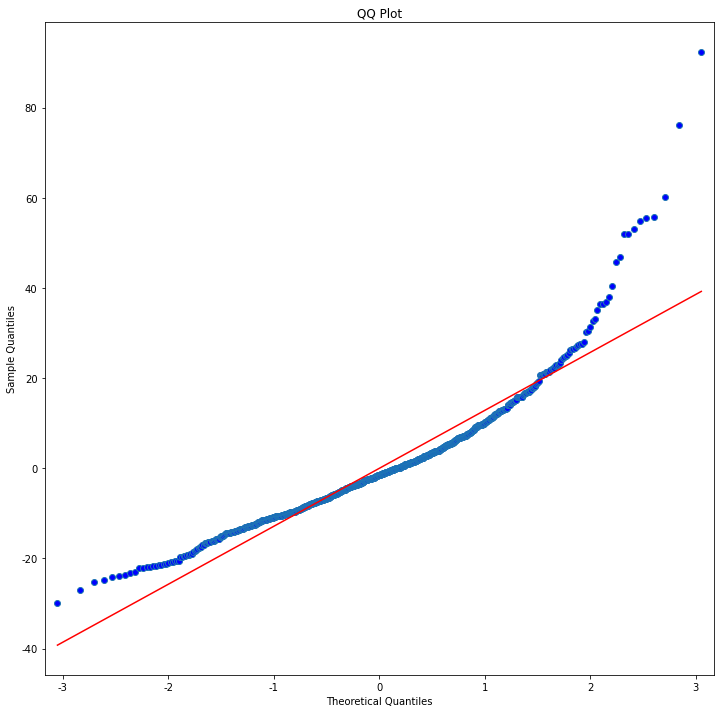

In [54]:
import matplotlib.pyplot as plt
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')